In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import func
import seaborn as sns
import plots
import ipywidgets as widgets
import os
from IPython.display import display

from func import ThreeD1, RMSE
from sklearn.metrics import accuracy_score
from statistics import mode
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#from sklearn.model_selection import cross_val_score
pd.set_option("display.max_rows", 100, "display.max_columns", 100) 
np.set_printoptions(precision=2)


In [2]:
#df = pd.read_excel('cec_clay_susc.xlsx')[:56]
df = pd.read_excel('cec_clay_susc.xlsx')[:173]

df.describe()

,NUMBER,Duration,Depth,Klf_IP,Klf_QP,Ph_F1,Mass,#_y,Rg_F3,Khf_IP,Khf_QP,Ph_F3,Xlf_IP,Xhf_IP,Kfd_abs,Kfd,Xfd_abs,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,Cu,...,Cd Error,Ag,Ag Error,Pd,Pd Error,Bal,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,Archaeology,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO
count,56.000000,56.000000,56.000000,173.000000,56.000000,56.000000,173.000000,56.000000,56.000000,173.000000,5.600000e+01,56.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,1.730000e+02,5.600000e+01,56.0,56.000000,56.0,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.0,56.0,56.0,56.0,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,173.000000,150.000000,56.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,65.000000
mean,128.500000,361.190357,84.607143,0.002966,0.000008,1.780714,10.413699,443.767857,3.035714,0.002644,5.588430e-07,1.749464,3.851155e-04,3.426173e-04,3.216557e-04,10.023602,4.249826e-05,8.147736e+05,0.0,3376.150357,0.0,104966.773571,0.0,5.670000,1.382143,336.833571,2.826607,87.617857,1.50750,0.0,2.999107,52.193750,1.420357,4.658571,1.296607,14.559643,2.105179,0.0,3.128036,0.0,1.689643,7.546607,2.072143,0.079464,4.018214,34.129643,3.471429,0.0,16.186429,9.710179,...,6.281964,0.738214,3.623214,0.646429,5.319286,506493.865714,1098.384464,7.329107,1.080357,3.212679,1.823750,0.0,1.5,0.0,1.5,0.0,1.5,55537.975536,1153.834286,230.206786,217.406964,380735.293571,1048.967857,5.42250,18.371250,1782.683929,1327.247143,6.855536,14.501250,0.796964,8.866429,0.0,19.163750,21.017857,0.242775,1.381900,84.357143,14.939364,2.978624,6.768439,10.065887,25.837597,11.050205,12.233698,23.283903,26.485640,24.392860,50.878500,0.576571,6.087692
std,129.429517,0.740427,60.721923,0.004042,0.000008,6.280166,3.703399,205.886022,0.187256,0.003618,1.932940e-06,3.690164,5.816412e-04,5.202483e-04,4.393032e-04,6.084587,6.305194e-05,1.395492e+05,0.0,2442.210344,0.0,37035.560062,0.0,2.773215,0.127089,155.551836,0.701866,55.872667,0.49634,0.0,0.540708,24.564462,0.355374,2.843824,0.144829,9.187658,0.338639,0.0,0.227104,0.0,0.131508,6.452734,0.359043,0.594656,0.350335,36.843258,0.763653,0.0,1.292301,9.846063,...,0.884304,1.539733,0.982307,1.894977,1.595178,27814.679966,74.493896,4.388561,0.185295,3.179280,0.326438,0.0,0.0,0.0,0.0,0.0,0.0,19595.534544,241.890321,468.180725,309.021511,65209.886639,56.098186,31.26507,2.523047,1683.146872,509.753206,14.302167,10.719625,3.467316,0.881541,0.0,1.076521,18.076093,0.430005,0.207847,60.796659,9.855823,1.978622,0.989544,6.634248,14.703730,6.588059,11.823587,16.553541,15.432102,17.038174,22.477296,0.762206,12.087746
min,1.000000,360.010000,4.000000,0.000003,-0.000002,-37.920000,5.830000,65.000000,3.000000,0.000001,-6.072000e-06,-0.790000,1.608132e-07,8.064890e-08,2.030000e-07,1.869159,1.196229e-08,4.877352e+05,0.0,0.000000,0.0,30473.500000,0.0,0.000000,1.090000,43.120000,1.190000,11.110000,0.69000,0.0,1.940000,9.580000,0.740000,0.000000,0.940000,2.330000,1.530000,0.0,2.740000,0.0,1.450000,0.000000,1.450000,0.000000,2.760000,0.000000,2.480000,0.0,14.000000,0.000000,...,3.250000,0.000000,1.740000,0.000000,1.800000,465954.7200

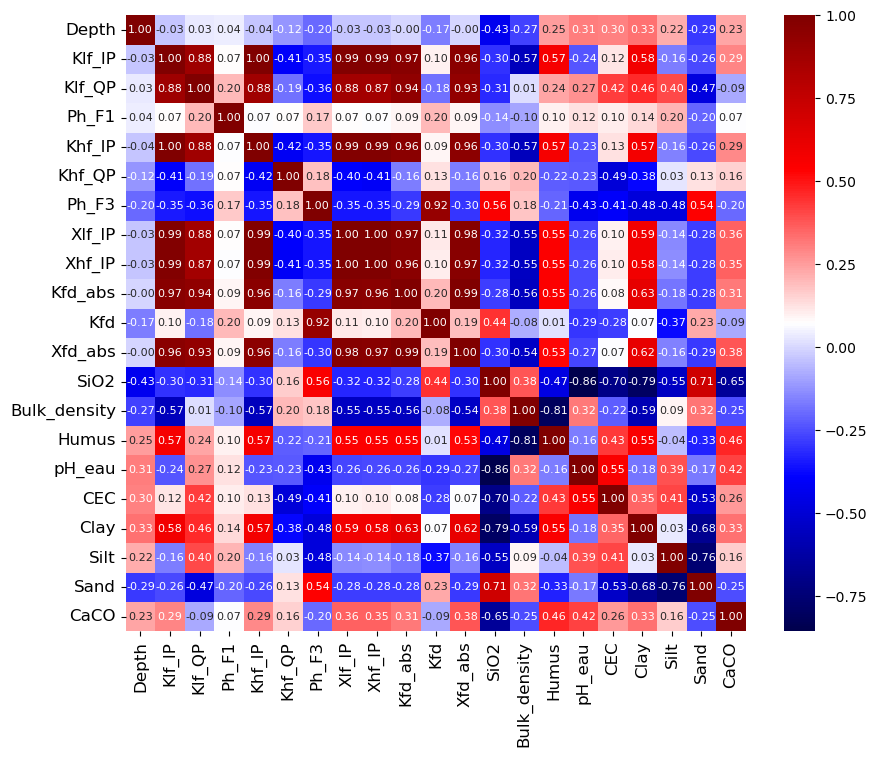

In [3]:
df_f = df[['Depth', 'Klf_IP', 'Klf_QP', 'Ph_F1', 'Khf_IP', 'Khf_QP', 'Ph_F3', 'Xlf_IP', 'Xhf_IP', 'Kfd_abs', 'Kfd', 'Xfd_abs', 'SiO2', 'Bulk_density', 
           'Humus', 'pH_eau', 'CEC', 'Clay', 'Silt', 'Sand', 'CaCO']]

# Setting the figure size
plt.figure(figsize=(10, 8))

# Plotting correlation heatmap with annotations
dataplot = sns.heatmap(df_f.corr(), cmap="seismic", annot=True, fmt=".2f", annot_kws={"size": 8})

dataplot.tick_params(axis='both', which='major', labelsize=12)

# Rotating y-axis labels for better visualization
dataplot.set_yticklabels(dataplot.get_yticklabels(), rotation=0)

# Setting the label size for x and y axes
dataplot.set_xlabel(dataplot.get_xlabel(), fontsize=14)
dataplot.set_ylabel(dataplot.get_ylabel(), fontsize=14)

plt.show()

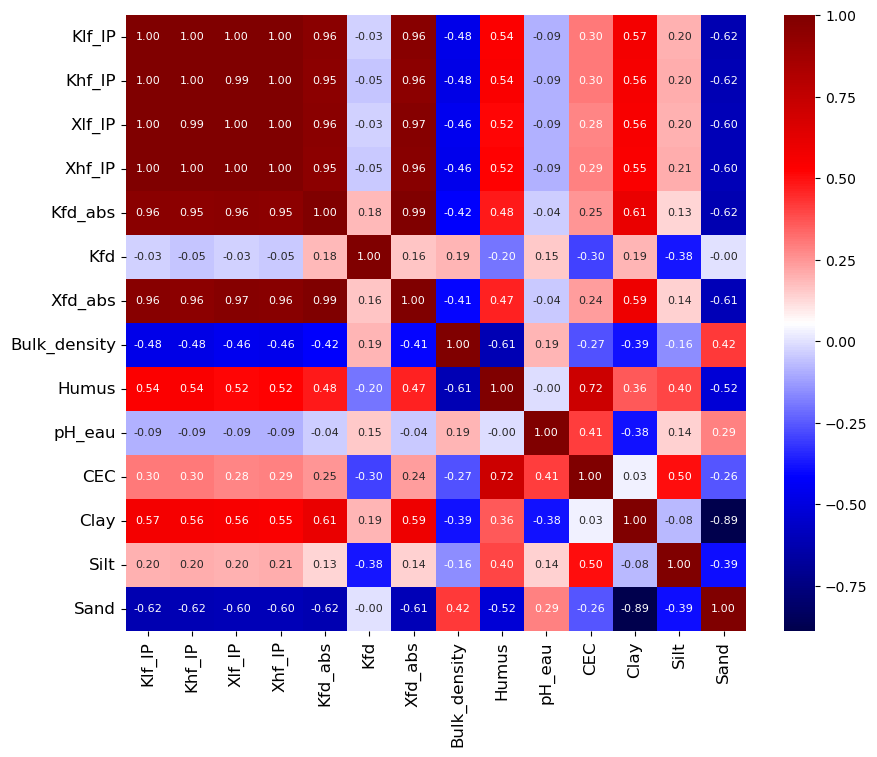

In [4]:
df_f = df[['Klf_IP', 'Khf_IP', 'Xlf_IP', 'Xhf_IP', 'Kfd_abs', 'Kfd', 'Xfd_abs', 'Bulk_density', 
           'Humus', 'pH_eau', 'CEC', 'Clay', 'Silt', 'Sand']][69:]

# Setting the figure size
plt.figure(figsize=(10, 8))

# Plotting correlation heatmap with annotations
dataplot = sns.heatmap(df_f.corr(), cmap="seismic", annot=True, fmt=".2f", annot_kws={"size": 8})

dataplot.tick_params(axis='both', which='major', labelsize=12)

# Rotating y-axis labels for better visualization
dataplot.set_yticklabels(dataplot.get_yticklabels(), rotation=0)

# Setting the label size for x and y axes
dataplot.set_xlabel(dataplot.get_xlabel(), fontsize=14)
dataplot.set_ylabel(dataplot.get_ylabel(), fontsize=14)

plt.show()

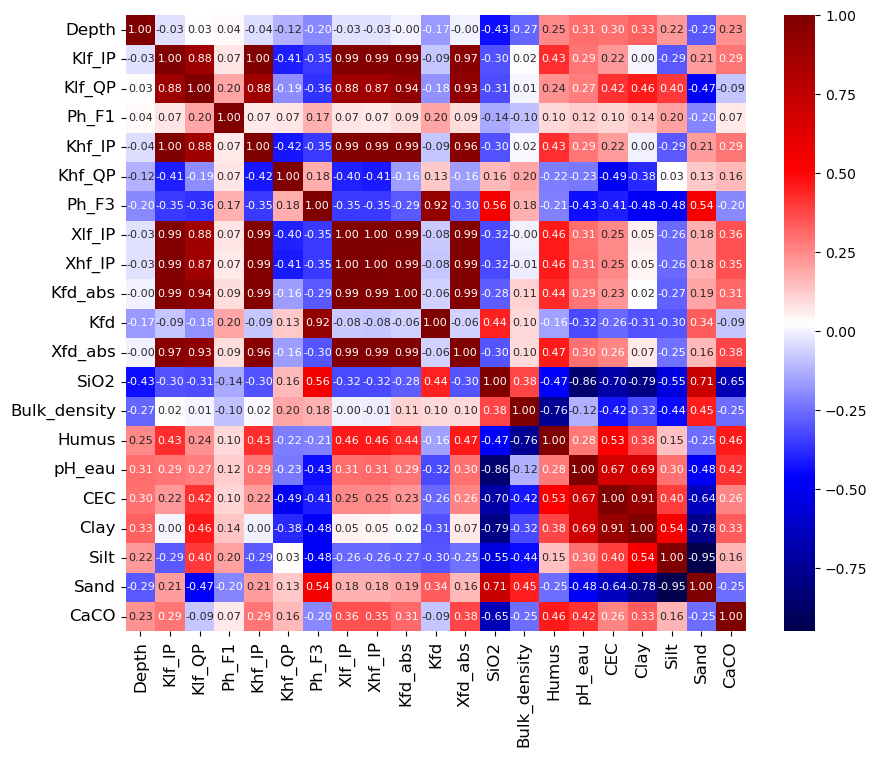

In [5]:
df_f = df[['Depth', 'Klf_IP', 'Klf_QP', 'Ph_F1', 'Khf_IP', 'Khf_QP', 'Ph_F3', 'Xlf_IP', 'Xhf_IP', 'Kfd_abs', 'Kfd', 'Xfd_abs', 'SiO2', 'Bulk_density', 
           'Humus', 'pH_eau', 'CEC', 'Clay', 'Silt', 'Sand', 'CaCO']][:69]

# Setting the figure size
plt.figure(figsize=(10, 8))

# Plotting correlation heatmap with annotations
dataplot = sns.heatmap(df_f.corr(), cmap="seismic", annot=True, fmt=".2f", annot_kws={"size": 8})

dataplot.tick_params(axis='both', which='major', labelsize=12)

# Rotating y-axis labels for better visualization
dataplot.set_yticklabels(dataplot.get_yticklabels(), rotation=0)

# Setting the label size for x and y axes
dataplot.set_xlabel(dataplot.get_xlabel(), fontsize=14)
dataplot.set_ylabel(dataplot.get_ylabel(), fontsize=14)

plt.show()

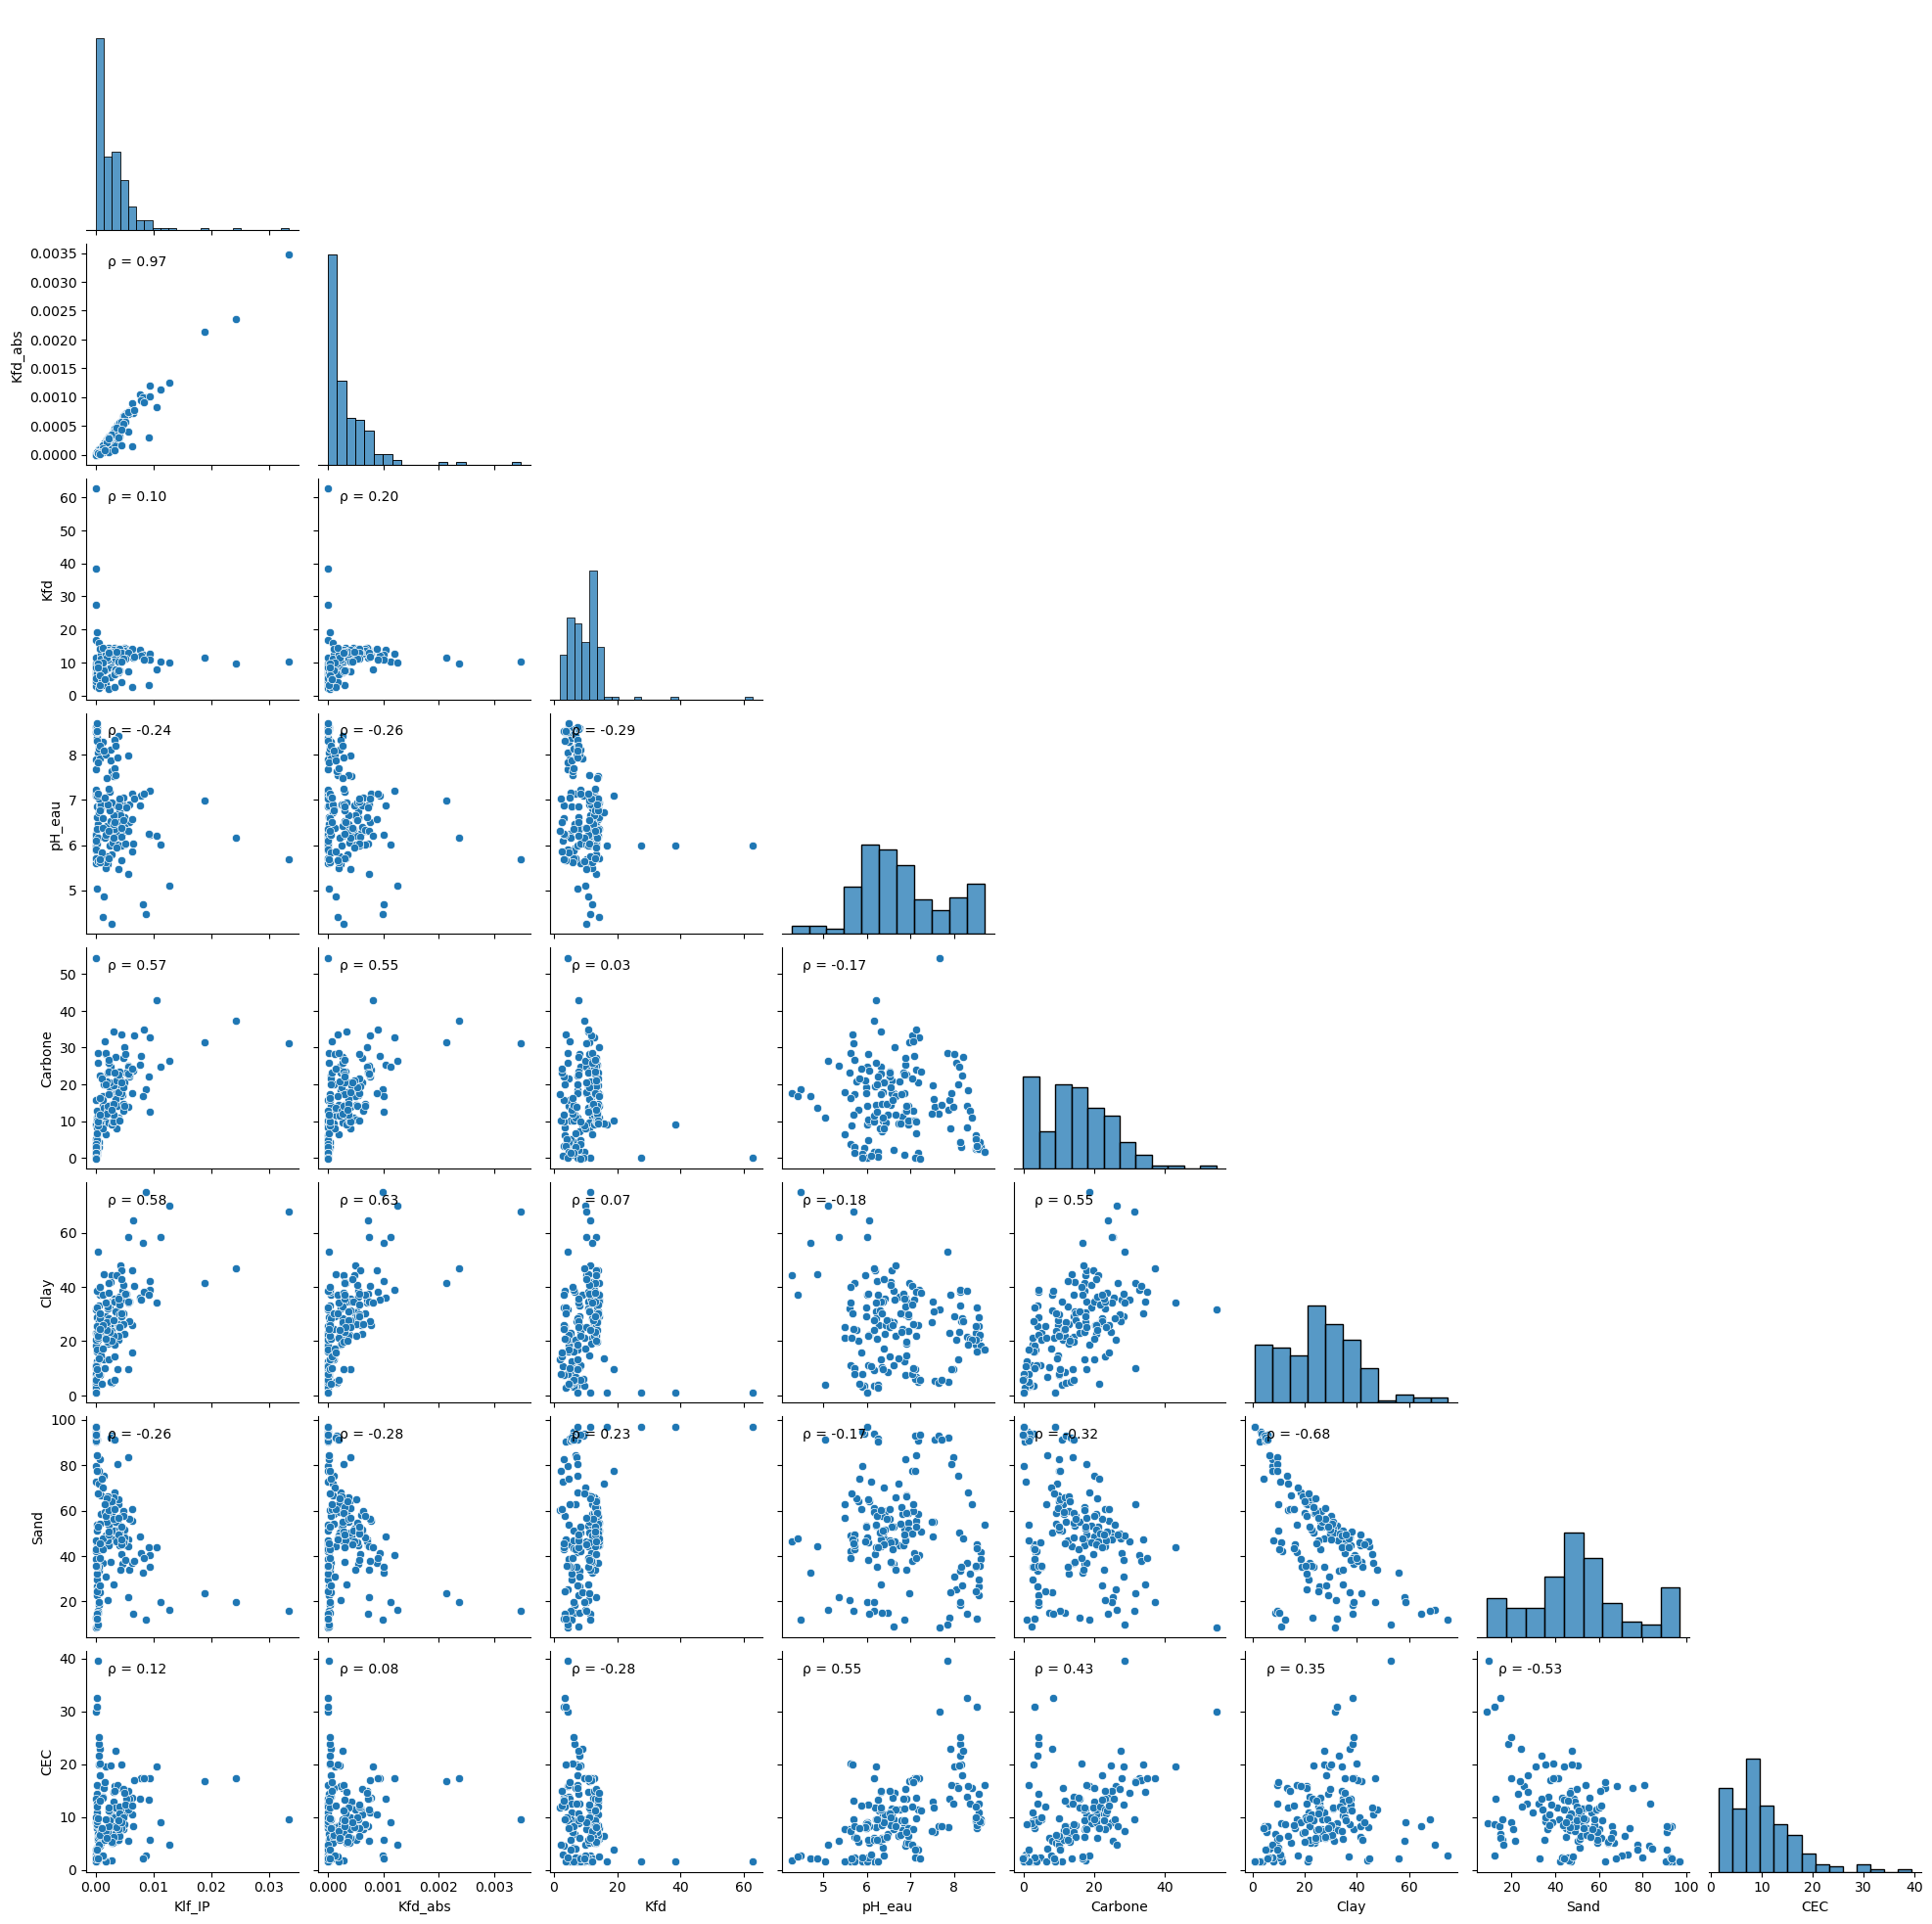

In [6]:
g = sns.pairplot(df.loc[:,['Klf_IP', 'Kfd_abs', 'Kfd', 'pH_eau', 'Carbone', 'Clay', 'Sand', 'CEC']], 
                  diag_kws=dict(fill=True), corner=True)

g.map_lower(func.corrfunc)
plt.show()

In [7]:
mapping = {
    "AN": ("black", "o"),
    "P": ("cornflowerblue", "o"),
    "S": ("orange", "o"),
    "Ea": ("blue", "o"),
    "Aa": ("navy", "o"),
    "HE": ("indianred", "o"),
    "L": ("bisque", "^"),
    "D": ("firebrick", "^"),
    "V": ("sandybrown", "^"),
    "HOEKE": ("teal", "^"),
    "EHBH": ("green", "^"),
}

def plot_data(axis, x_col, y_col, include_label=False, aa=0.7, ss=60, lw=0, label_fontsize=10, legend_fontsize=10):
    corr = round(np.corrcoef(x_col, y_col)[0][1], 2)
    for start_str, (color, marker) in mapping.items():
        mask = df['SAMPLE'].str.startswith(start_str)
        label = f"{start_str} Site" if include_label else None
        axis.scatter(x_col[mask], y_col[mask], alpha=aa, s=ss, linewidth=lw, c=color, marker=marker, label=label)
    # Apply logarithmic scale to the y-axis
    axis.set_yscale('log')
    axis.text(0, 0.98, s=f'Corr = {corr}', fontsize=label_fontsize, 
              verticalalignment='top', horizontalalignment='left', 
              transform=axis.transAxes)
    if include_label:
        axis.legend(fontsize=legend_fontsize)

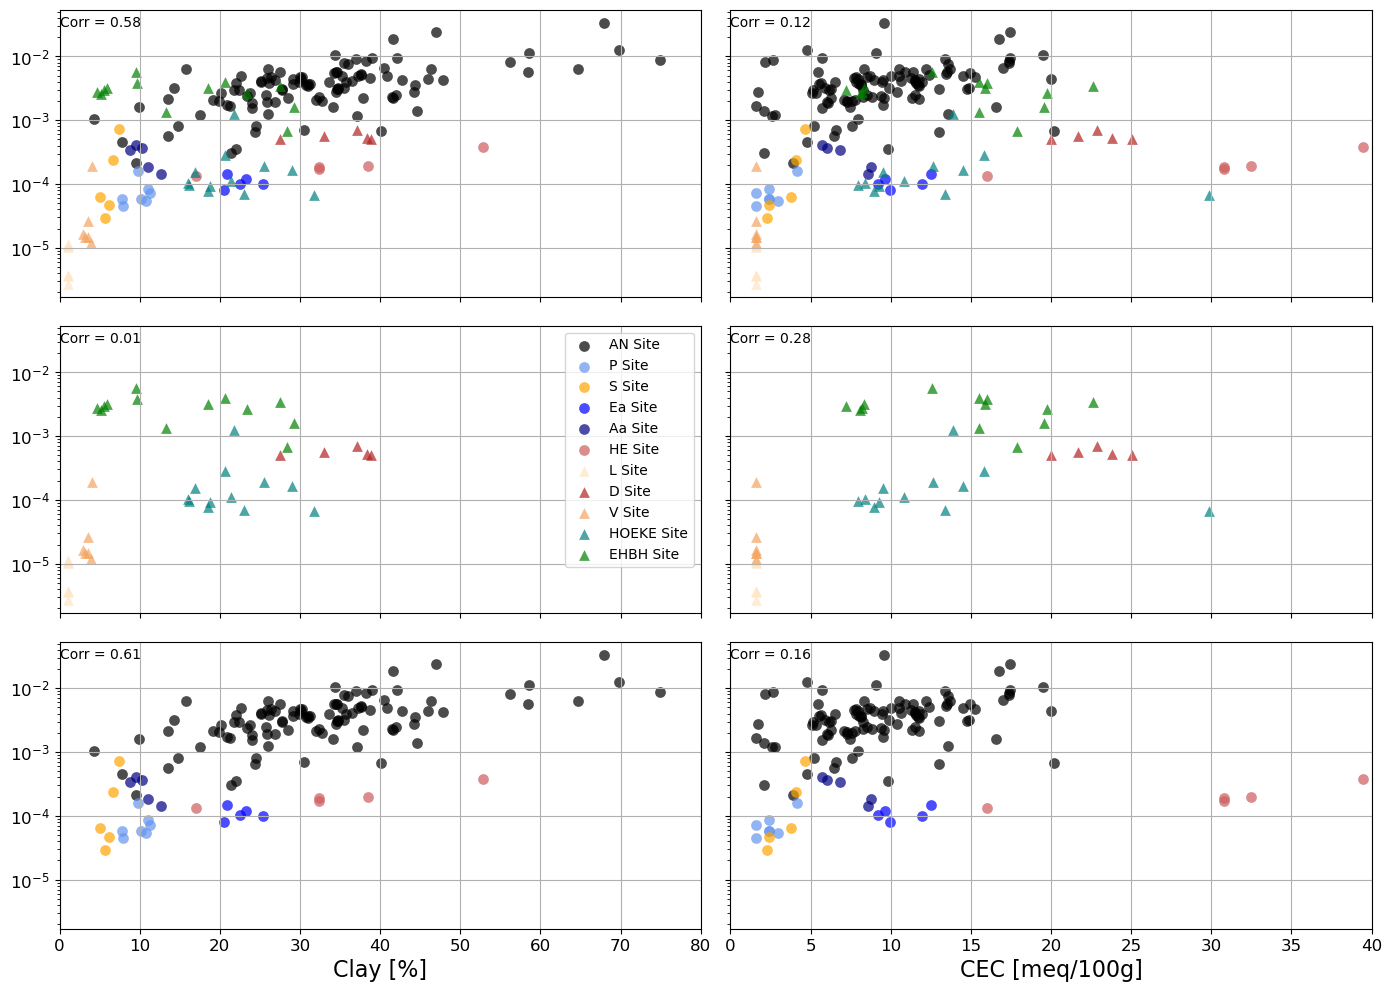

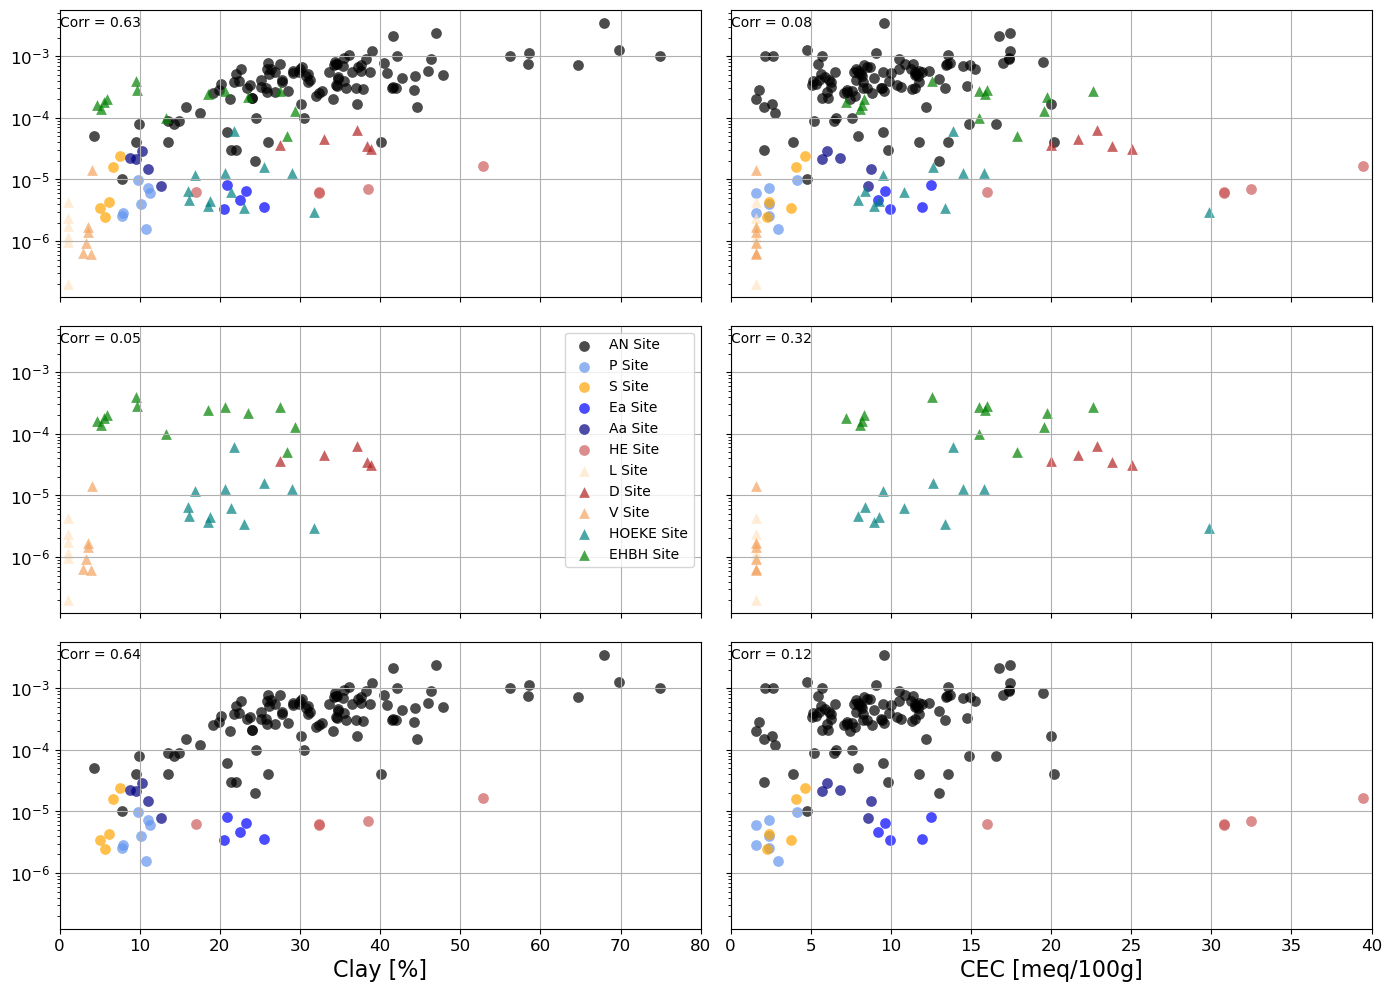

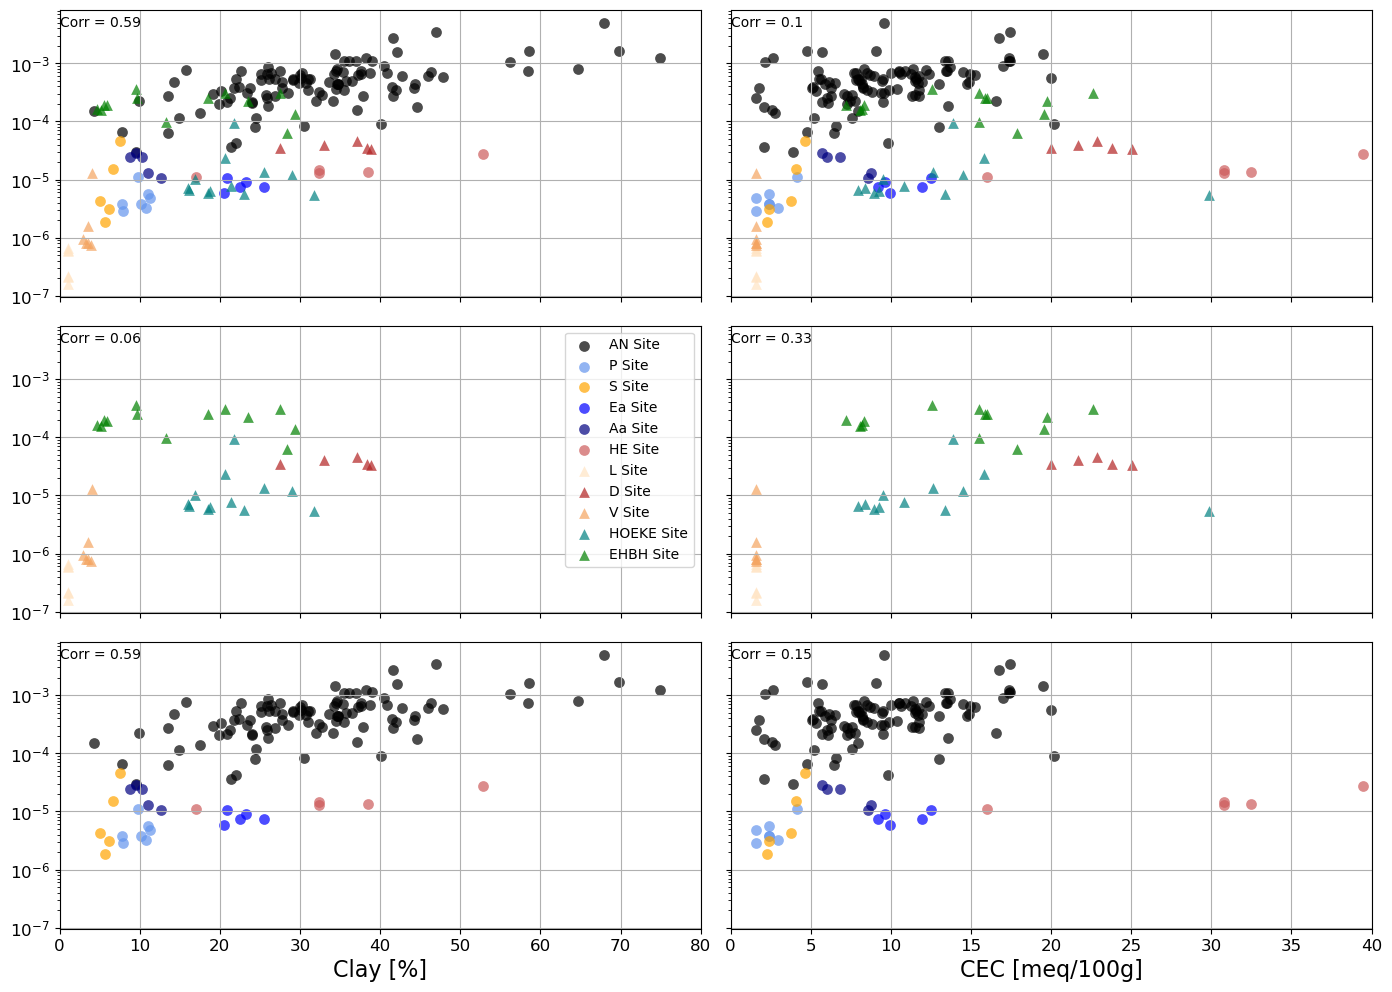

In [8]:
def create_and_save_plots(target_var, file_name):
    # Ensure the output folder exists, create it if it doesn't
    output_folder = 'figures_output'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Create subplots with shared x-axes within each column
    fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharey=True, sharex='col')
    axes = axes.flatten()  # Flatten to easily iterate over

    # Define your conditions for plotting
    conditions = [
        (df['Clay'], df[target_var], 0, 80),  
        (df['CEC'], df[target_var], 0, 40),  
        (df['Clay'][df['Archaeology'] == 1], df[target_var][df['Archaeology'] == 1], 0, 80, True),  
        (df['CEC'][df['Archaeology'] == 1], df[target_var][df['Archaeology'] == 1], 0, 40),
        (df['Clay'][df['Archaeology'] == 0], df[target_var][df['Archaeology'] == 0], 0, 80),
        (df['CEC'][df['Archaeology'] == 0], df[target_var][df['Archaeology'] == 0], 0, 40),
    ]

    # Loop through conditions and plot
    for ax, (x, y, xlim_lower, xlim_upper, *include_label) in zip(axes, conditions):
        plot_data(ax, x, y, include_label=bool(include_label))
        ax.set_xlim(xlim_lower, xlim_upper)  # Set x-axis limits
        ax.grid(True)  # Enable the grid
        ax.tick_params(axis='y', labelsize=12) 
        ax.tick_params(axis='x', labelsize=12) 

    # Set legend for the third subplot (index 2)
    axes[2].legend(loc='upper right', fontsize=10)
    axes[4].set_xlabel('Clay [%]', fontsize=16)  # Set x-axis label
    axes[5].set_xlabel('CEC [meq/100g]', fontsize=16)  # Set x-axis label

    plt.tight_layout(pad=1.0)  # Adjust layout

    # Full file path
    full_file_path = os.path.join(output_folder, file_name)

    # Save and show the figure
    plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
create_and_save_plots('Klf_IP', 'Klf_IP_clay_CEC.png')
create_and_save_plots('Kfd_abs', 'Kfd_abs_clay_CEC.png')
create_and_save_plots('Xlf_IP', 'Klf_clay_CEC.png')

## Modelling Klf(Clay, CEC)


In [9]:
results_r2 = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])
results_rmse = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])

In [10]:
# Enhanced 3D plotting function with axis labels
def plot_3d(df, x, y, z, X, Y, Z, elev=30, azim=30):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[x], df[y], df[z], c="navy", s=15)
    ax.plot_surface(X, Y, Z, alpha=0.5, color='orange', edgecolor='none')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    plt.show()


def bars_plot(feature_sets, test_errors_summary, train_errors_summary, file_name):
    # Ensure the output folder exists, create it if it doesn't
    output_folder = 'figures_output'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    fig, ax = plt.subplots()
    width = 0.35  # the width of the bars

    x = np.arange(len(feature_sets))
    rects1 = ax.bar(x - width/2, test_errors_summary, width, color = 'red', label='Test')
    rects2 = ax.bar(x + width/2, train_errors_summary, width, color = 'blue', label='Train')

    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_ylabel('Scores')
    ax.set_xticks(range(len(test_errors_summary)), feature_sets, rotation = 15)
    ax.set_ylim(0, 1)
    ax.legend()
    fig.tight_layout()

    # Full file path
    full_file_path = os.path.join(output_folder, file_name)

    # Save and show the figure
    plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
    plt.show()


# Function to perform linear regression and print results
def perform_regression_and_select_best(feature_sets, target, df):
    best_score = float('-inf')
    best_regressor = None
    best_features = None
    
    for features in feature_sets:
        reg = LinearRegression().fit(df[list(features)].to_numpy(), df[target])
        predictions = reg.predict(df[list(features)].to_numpy())
        score = reg.score(df[list(features)].to_numpy(), df[target])
        rmse = np.sqrt(np.mean((predictions - df[target])**2))
        
        # Update best regressor based on R² score
        if score > best_score:
            best_score = score
            best_regressor = reg
            best_features = features
        
        # Print results for each feature set
        print(f'Feature(s) {features}')
        print(f'RMSE: {rmse:.8f}')
        print(f'Score: {score:.3f}')
        print(f"Coefficients: {reg.coef_}", f"Intercept: {reg.intercept_}\n")
    
    # Return the best regressor and its features
    return best_regressor, best_features

In [11]:
df_fil = df.copy()[:69]

# Define feature sets for regressions
feature_sets_1 = [('Clay',), ('Clay', 'Sand'), ('Clay', 'Klf_IP'), ('Clay', 'Kfd')]
target_1 = 'CEC'
feature_sets_2 = [('Clay',), ('Clay', 'CEC'), ('Clay', 'Sand'), ('Clay', 'pH_eau'), ('Clay', 'Humus')]
target_2 = 'Klf_IP'

# Generalize the meshgrid and Z values generation
def generate_meshgrid_and_Z(reg, df, features, n_points=50):
    x_range = np.linspace(df[features[0]].min(), df[features[0]].max(), n_points)
    y_range = np.linspace(df[features[1]].min(), df[features[1]].max(), n_points)
    X, Y = np.meshgrid(x_range, y_range)
    Z = reg.coef_[0] * X + reg.coef_[1] * Y + reg.intercept_
    return X, Y, Z

# Define your df_fil, feature_sets_1, and feature_sets_2 as before

# Find the best regressor and its features for each target
best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, df_fil)
best_reg_2, best_features_2 = perform_regression_and_select_best(feature_sets_2, target_2, df_fil)

# Generate meshgrids and Z values for the best regressor of each set
X1, Y1, Z1 = generate_meshgrid_and_Z(best_reg_1, df_fil, best_features_1)
X2, Y2, Z2 = generate_meshgrid_and_Z(best_reg_2, df_fil, best_features_2)

# Interactive plots
def interactive_plot_1(elev=30, azim=30):
    plot_3d(df_fil, best_features_1[0], best_features_1[1], target_1, X1, Y1, Z1, elev, azim)

def interactive_plot_2(elev=30, azim=30):
    plot_3d(df_fil, best_features_2[0], best_features_2[1], target_2, X2, Y2, Z2, elev, azim)

# Display interactive widgets
display(widgets.interactive(interactive_plot_1, elev=(0, 90, 2), azim=(0, 360, 2)))
display(widgets.interactive(interactive_plot_2, elev=(0, 90, 2), azim=(0, 360, 2)))
# Here we implemented linear functions to predict soil CEC based on different features. The model development fits the entire dataset.
# The Dataset was filtered to consider non-tropical soils
# With these trhee conditions, adding soil susceptibility to clay is the optimal for CEC prediction.
# Further analysis follows the same problem for non-linear modelling with split of train and test datasets

Feature(s) ('Clay',)
RMSE: 3.78238799
Score: 0.824
Coefficients: [0.7] Intercept: -0.31636207523237303

Feature(s) ('Clay', 'Sand')
RMSE: 3.63364806
Score: 0.838
Coefficients: [0.81 0.05] Intercept: -4.991355614013395

Feature(s) ('Clay', 'Klf_IP')
RMSE: 3.25720920
Score: 0.870
Coefficients: [6.99e-01 1.60e+03] Intercept: -1.4246657060678771

Feature(s) ('Clay', 'Kfd')
RMSE: 3.77694005
Score: 0.825
Coefficients: [0.71 0.03] Intercept: -0.6108406630594949

Feature(s) ('Clay',)
RMSE: 0.00120043
Score: 0.000
Coefficients: [4.07e-07] Intercept: 0.0006919416646322846

Feature(s) ('Clay', 'CEC')
RMSE: 0.00103376
Score: 0.258
Coefficients: [-0.  0.] Intercept: 0.0007429825238092062

Feature(s) ('Clay', 'Sand')
RMSE: 0.00112617
Score: 0.120
Coefficients: [4.47e-05 2.14e-05] Intercept: -0.0011582815338193348

Feature(s) ('Clay', 'pH_eau')
RMSE: 0.00110194
Score: 0.157
Coefficients: [-3.80e-05  6.14e-04] Intercept: -0.003238611798834048

Feature(s) ('Clay', 'Humus')
RMSE: 0.00106572
Score: 0.212

interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [12]:
def stochastic_poly(df, feature_columns, Y, n=4, iters=1000, round_n=3):
    ypred_train_best, ypred_test_best, R2_train_t_best, R2_test_t_best, RMSE_train_t_best, RMSE_test_t_best = [], [], [], [], [], []
    X = df[feature_columns]

    for i in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
        LinReg = LinearRegression()
        ypred_train_, ypred_test_, R2_train_t_, R2_test_t_, RMSE_train_t_, RMSE_test_t_ = [], [], [], [], [], []

        for k in range(n):
            poly = PolynomialFeatures(degree=k)
            poly.fit(X_train)
            Xt_train = poly.transform(X_train)
            Xt_test = poly.transform(X_test)

            LinReg.fit(Xt_train, y_train)
            ypred_train = LinReg.predict(Xt_train)
            ypred_test = LinReg.predict(Xt_test)

            R2_train_t = r2_score(y_train, ypred_train)
            R2_test_t = r2_score(y_test, ypred_test)
            RMSE_train_t = RMSE(y_train, ypred_train)
            RMSE_test_t = RMSE(y_test, ypred_test)

            ypred_train_.append(ypred_train)
            ypred_test_.append(ypred_test)
            R2_train_t_.append(R2_train_t)
            R2_test_t_.append(R2_test_t)
            RMSE_train_t_.append(RMSE_train_t)
            RMSE_test_t_.append(RMSE_test_t)

        ypred_train_best.append(ypred_train_)
        ypred_test_best.append(ypred_test_)
        R2_train_t_best.append(R2_train_t_)
        R2_test_t_best.append(R2_test_t_)
        RMSE_train_t_best.append(RMSE_train_t_)
        RMSE_test_t_best.append(RMSE_test_t_)

    r2_test_n1 = [inner_list[0] for inner_list in R2_test_t_best]
    r2_test_n2 = [inner_list[1] for inner_list in R2_test_t_best]
    r2_test_n3 = [inner_list[2] for inner_list in R2_test_t_best]
    r2_test_n4 = [inner_list[3] for inner_list in R2_test_t_best]
    
    r2_means = [np.mean(r2_test_n1), np.mean(r2_test_n2), np.mean(r2_test_n3), np.mean(r2_test_n4)]
    best_n = r2_means.index(np.max(r2_means))
    return best_n, round(np.mean([inner_list[best_n] for inner_list in R2_test_t_best]), round_n), round(np.mean([inner_list[best_n] for inner_list in R2_train_t_best]), round_n), round(np.mean([inner_list[best_n] for inner_list in RMSE_test_t_best]), round_n), round(np.mean([inner_list[best_n] for inner_list in RMSE_train_t_best]), round_n)                                             

# Continue from here!

## CEC prediction for non tropical soils

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.78 0.836 3.889 3.633 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.819 0.868 3.54 3.256 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.78 0.87 3.937 3.233 ['Clay', 'pH_eau']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.834 0.872 3.421 3.208 ['Clay', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.827 0.883 3.464 3.072 ['Clay', 'pH_eau', 'Sand', 'Humus']


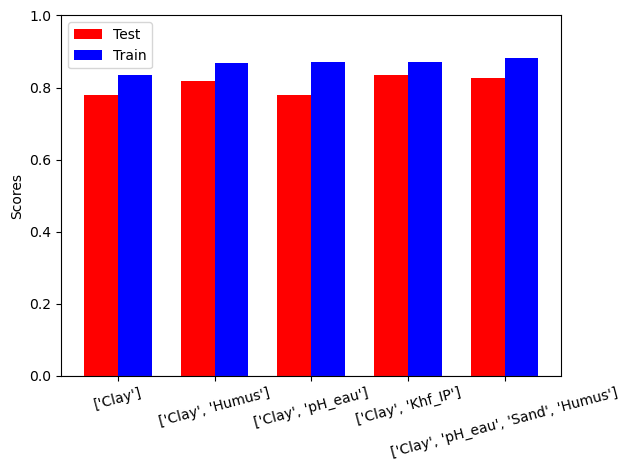

R2 0.8699538113556554
RMSE 3.2554627567029413
LinReg_CEC_NTS [0.00e+00 6.99e-01 1.73e+03]


interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [13]:
feature_sets = [
    ['Clay'],
    ['Clay', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'Khf_IP'],
  #  ['Clay', 'Klf_QP'],
    ['Clay', 'pH_eau', 'Sand', 'Humus']
]

target = df_fil['CEC']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df_fil[feature_set].values
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df_fil, feature_set, target, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets, test_errors_summary, train_errors_summary, 'results_CEC')

################## Puesta en marcha y plot #################

LinReg_CEC_NTS = LinearRegression()
x = df_fil[['Clay', 'Khf_IP']]
poly = PolynomialFeatures(degree=1)
poly.fit(x)
xt = poly.transform(x)
LinReg_CEC_NTS.fit(xt, target)
ypred = LinReg_CEC_NTS.predict(xt)
R2 = r2_score(target, ypred)
RMSE_ = RMSE(target, ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
a2 = np.linspace(df_fil.Clay.min(), df_fil.Clay.max(), 50)
b2 = np.linspace(df_fil.Khf_IP.min(), df_fil.Khf_IP.max(), 50)
A2, B2 = np.meshgrid(a2, b2)

print('LinReg_CEC_NTS', LinReg_CEC_NTS.coef_)
# Calculate the Z values for the plane using the meshgrid
Z2 = LinReg_CEC_NTS.coef_[0]*LinReg_CEC_NTS.intercept_ + LinReg_CEC_NTS.coef_[1]*A2 + LinReg_CEC_NTS.coef_[2]*B2 + LinReg_CEC_NTS.intercept_

def interactive_plot(elev=30, azim=30):
    return plot_3d(df_fil, 'Clay', 'Khf_IP', 'CEC', A2, B2, Z2, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# De aca concluyo que el grado del polinomio puede mejorar el fitting, y que Khf_IP es tan efectivo como Humus para predecir CEC. Esperemos aun las muestras de Polonia.

## CEC prediction for tropical and non-tropical soils

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.225 0.26 5.752 5.655 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.277 0.457 5.526 4.848 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 3 0.576 0.681 4.164 3.697 ['Clay', 'pH_eau']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.052 0.135 6.335 6.11 ['Clay', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.768 0.849 3.11 2.549 ['Clay', 'pH_eau', 'Sand', 'Humus']


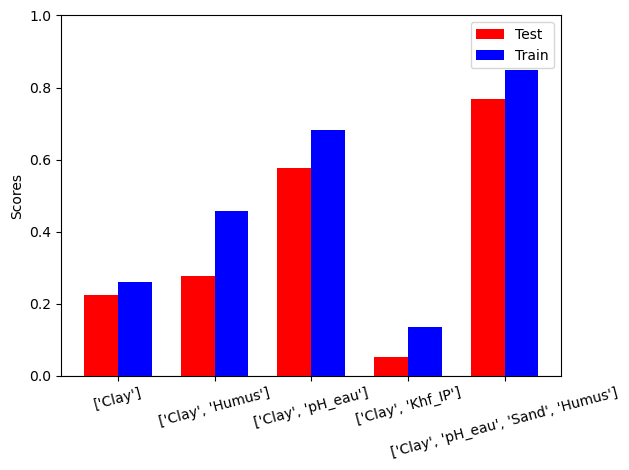

R2 0.8419221391014993
RMSE 2.6300766638591515


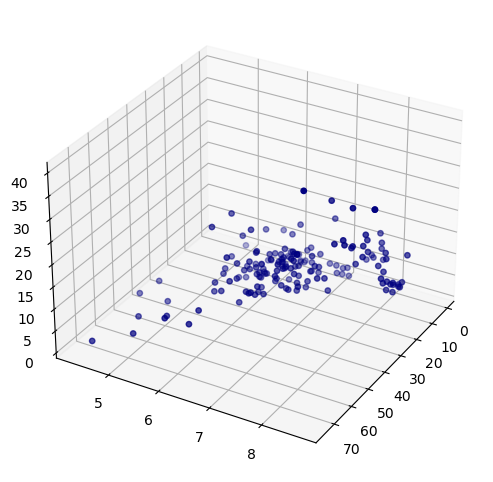

interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [15]:
feature_sets = [
    ['Clay'],
    ['Clay', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'Khf_IP'],
    ['Clay', 'pH_eau', 'Sand', 'Humus']
]

target = df['CEC']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df[feature_set].values
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, feature_set, target, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets, test_errors_summary, train_errors_summary, 'results_CEC_all')

################## Puesta en marcha y plot #################

LinReg_CEC_TS = LinearRegression()
x = df[['Clay', 'pH_eau', 'Sand', 'Humus']]
poly = PolynomialFeatures(degree=2)
poly.fit(x)
xt = poly.transform(x)
LinReg_CEC_TS.fit(xt, target)
ypred = LinReg_CEC_TS.predict(xt)
R2 = r2_score(target, ypred)
RMSE_ = RMSE(target, ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
a3 = np.linspace(df.Clay.min(), df.Clay.max(), 50)
b3 = np.linspace(df.pH_eau.min(), df.pH_eau.max(), 50)
c3 = np.linspace(df.Sand.min(), df.Sand.max(), 50)
d3 = np.linspace(df.Humus.min(), df.Humus.max(), 50)

A3, B3, C3, D3 = np.meshgrid(a3, b3, c3, d3)

# Calculate the Z values for the plane using the meshgrid
Z3 = LinReg_CEC_TS.coef_[0]*LinReg_CEC_TS.intercept_ + LinReg_CEC_TS.coef_[1]*A3 + LinReg_CEC_TS.coef_[2]*B3 + LinReg_CEC_TS.coef_[3]*C3 + LinReg_CEC_TS.coef_[4]*D3 
+ LinReg_CEC_TS.coef_[5]*A3*A3 + LinReg_CEC_TS.coef_[6]*A3*B3 + LinReg_CEC_TS.coef_[7]*A3*C3 + LinReg_CEC_TS.coef_[8]*A3*D3 + LinReg_CEC_TS.coef_[9]*B3*B3 
+ LinReg_CEC_TS.coef_[10]*B3*C3 + LinReg_CEC_TS.coef_[11]*B3*D3 + LinReg_CEC_TS.coef_[12]*C3*C3 + LinReg_CEC_TS.coef_[13]*C3*D3 + LinReg_CEC_TS.coef_[14]*D3*D3

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Clay'], df['pH_eau'], df['CEC'], c="navy", s=15)
ax.view_init(elev=30, azim=30)
plt.show()

#def interactive_plot(elev=30, azim=30):
#    return plot_3d(df, 'Clay', 'pH_eau', 'CEC', A3, B3, Z3[0][1], elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# De aca concluyo que el grado del polinomio puede mejorar el fitting, y que Khf_IP es tan efectivo como Humus para predecir CEC. Esperemos aun las muestras de Polonia.

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.498 0.505 2.998 2.944 ['Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.489 0.519 3.021 2.903 ['Khf_IP', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.156 0.314 3.904 3.471 ['Clay', 'pH_eau']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.048 0.352 3.996 3.371 ['Clay', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.589 0.634 2.7 2.527 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.529 0.573 2.886 2.731 ['Clay', 'Humus', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.676 0.719 2.367 2.206 ['Clay', 'pH_eau', 'Sand', 'Humus']


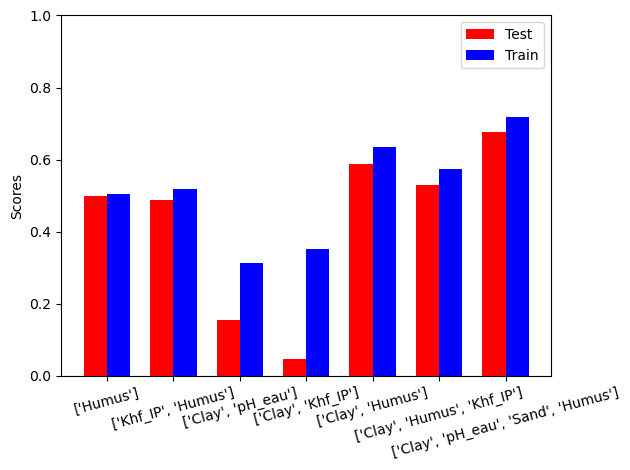

R2 0.8017006558270277
RMSE 1.8922628311571266


<Figure size 640x480 with 0 Axes>

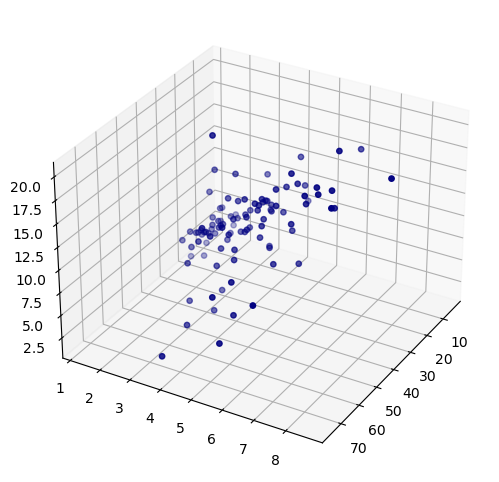

interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [ ]:
feature_sets = [
    ['Humus'],
    ['Khf_IP', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'Khf_IP'],
    ['Clay', 'Humus'],
    ['Clay', 'Humus', 'Khf_IP'],
    ['Clay', 'pH_eau', 'Sand', 'Humus']
]

df_trop = df[69:]
target = df_trop['CEC']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df_trop[feature_set].values
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df_trop, feature_set, target, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets, test_errors_summary, train_errors_summary)

################## Puesta en marcha y plot #################

LinReg_CEC_TS = LinearRegression()
x = df_trop[['Clay', 'pH_eau', 'Sand', 'Humus']]
poly = PolynomialFeatures(degree=2)
poly.fit(x)
xt = poly.transform(x)
LinReg_CEC_TS.fit(xt, target)
ypred = LinReg_CEC_TS.predict(xt)
R2 = r2_score(target, ypred)
RMSE_ = RMSE(target, ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
a3 = np.linspace(df_trop.Clay.min(), df_trop.Clay.max(), 50)
b3 = np.linspace(df_trop.pH_eau.min(), df_trop.pH_eau.max(), 50)
c3 = np.linspace(df_trop.Sand.min(), df_trop.Sand.max(), 50)
d3 = np.linspace(df_trop.Humus.min(), df_trop.Humus.max(), 50)

A3, B3, C3, D3 = np.meshgrid(a3, b3, c3, d3)

# Calculate the Z values for the plane using the meshgrid
Z3 = LinReg_CEC_TS.coef_[0]*LinReg_CEC_TS.intercept_ + LinReg_CEC_TS.coef_[1]*A3 + LinReg_CEC_TS.coef_[2]*B3 + LinReg_CEC_TS.coef_[3]*C3 + LinReg_CEC_TS.coef_[4]*D3 
+ LinReg_CEC_TS.coef_[5]*A3*A3 + LinReg_CEC_TS.coef_[6]*A3*B3 + LinReg_CEC_TS.coef_[7]*A3*C3 + LinReg_CEC_TS.coef_[8]*A3*D3 + LinReg_CEC_TS.coef_[9]*B3*B3 
+ LinReg_CEC_TS.coef_[10]*B3*C3 + LinReg_CEC_TS.coef_[11]*B3*D3 + LinReg_CEC_TS.coef_[12]*C3*C3 + LinReg_CEC_TS.coef_[13]*C3*D3 + LinReg_CEC_TS.coef_[14]*D3*D3

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_trop['Clay'], df_trop['Humus'], df_trop['CEC'], c="navy", s=15)
ax.view_init(elev=30, azim=30)
plt.show()

#def interactive_plot(elev=30, azim=30):
#    return plot_3d(df, 'Clay', 'pH_eau', 'CEC', A3, B3, Z3[0][1], elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# De aca concluyo que el grado del polinomio puede mejorar el fitting, y que Khf_IP es tan efectivo como Humus para predecir CEC. Esperemos aun las muestras de Polonia.

## Khf_IP prediction for non-tropical soils

feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol: ['Clay'] 0 -0.159 0.0 0.001 0.001
feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol: ['Clay', 'Humus'] 0 -0.159 0.0 0.001 0.001
feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol: ['Clay', 'pH_eau'] 1 -0.155 0.167 0.001 0.001
feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol: ['Clay', 'CEC'] 3 0.124 0.689 0.001 0.001
feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol: ['Clay', 'pH_eau', 'Sand', 'Humus'] 2 0.146 0.835 0.001 0.0


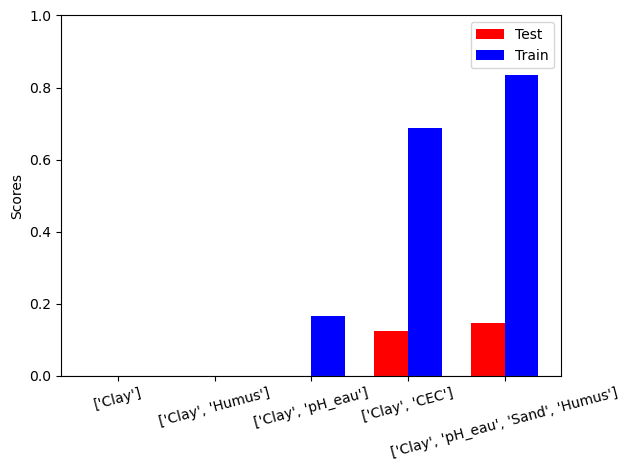

R2 0.6651475990040276
RMSE 0.0006458790392975342
xt[0] [1.00e+00 2.17e+01 1.39e+01 4.72e+02 3.01e+02 1.92e+02 1.03e+04 6.54e+03
 4.17e+03 2.66e+03]
LinReg_Khf_NTS [ 0.00e+00 -1.71e-04  3.74e-04  2.54e-05 -7.58e-05  5.35e-05  1.26e-07
 -1.99e-06  5.06e-06 -3.53e-06]


<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=30, description='elev', max=90, step=5), IntSlider(value=30, description…

In [ ]:
feature_sets = [
    ['Clay'],
    ['Clay', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'CEC'],
    ['Clay', 'pH_eau', 'Sand', 'Humus']
]

target = df_fil['Khf_IP']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df_fil[feature_set].values
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df_fil, feature_set, target, iters=100)
    print('feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol:', feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets, test_errors_summary, train_errors_summary)

################## Puesta en marcha y plot #################

LinReg_Khf_NTS = LinearRegression()
x = df_fil[['Clay', 'CEC']]
poly = PolynomialFeatures(degree=3)
poly.fit(x)
xt = poly.transform(x)
LinReg_Khf_NTS.fit(xt, target)
ypred = LinReg_Khf_NTS.predict(xt)
R2 = r2_score(target, ypred)
RMSE_ = RMSE(target, ypred)
print('R2', R2)
print('RMSE', RMSE_)
print('xt[0]', xt[0])
# Create a meshgrid for Clay and Khf_IP
a4 = np.linspace(df_fil.Clay.min(), df_fil.Clay.max(), 50)
b4 = np.linspace(df_fil.CEC.min(), df_fil.CEC.max(), 50)
A4, B4 = np.meshgrid(a4, b4)

print('LinReg_Khf_NTS', LinReg_Khf_NTS.coef_)
# Calculate the Z values for the plane using the meshgrid
zz = LinReg_Khf_NTS.coef_[0]*LinReg_Khf_NTS.intercept_ + LinReg_Khf_NTS.coef_[1]*A4 + LinReg_Khf_NTS.coef_[2]*B4 

def interactive_plot(elev=30, azim=30):
    return plot_3d(df_fil, xx, yy, zz, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 5), azim=(0, 360, 5))

## Khf_IP prediction for tropical and non-tropical soils

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.251 0.336 0.003 0.003 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.329 0.429 0.003 0.003 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.256 0.355 0.003 0.003 ['Clay', 'pH_eau']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.301 0.538 0.003 0.002 ['Clay', 'CEC']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.349 0.459 0.003 0.003 ['Clay', 'pH_eau', 'Sand', 'Humus']


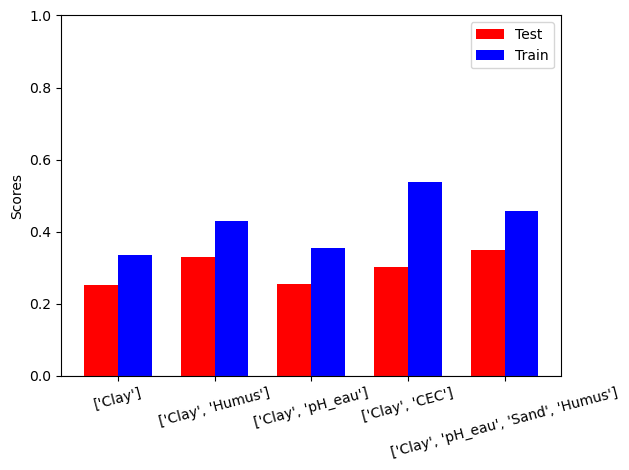

R2 0.44931012601246045
RMSE 0.002677200923046284
LinReg_Khf_TS [ 0.00e+00  1.22e-04 -2.15e-04  2.89e-05  6.34e-04]


<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=30, description='elev', max=90, step=5), IntSlider(value=30, description…

In [ ]:
feature_sets = [
    ['Clay'],
    ['Clay', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'CEC'],
    ['Clay', 'pH_eau', 'Sand', 'Humus']
]

target = df['Khf_IP']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df[feature_set].values
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, feature_set, target, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets, test_errors_summary, train_errors_summary)

################## Puesta en marcha y plot #################

LinReg_Khf_TS = LinearRegression()
x = df[['Clay', 'pH_eau', 'Sand', 'Humus']]
poly = PolynomialFeatures(degree=1)
poly.fit(x)
xt = poly.transform(x)
LinReg_Khf_TS.fit(xt, target)
ypred = LinReg_Khf_TS.predict(xt)
R2 = r2_score(target, ypred)
RMSE_ = RMSE(target, ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
x_ = np.linspace(df.Clay.min(), df.Clay.max(), 50)
y_ = np.linspace(df.Humus.min(), df.Humus.max(), 50)
xx, yy = np.meshgrid(x_, y_)

print('LinReg_Khf_TS', LinReg_Khf_TS.coef_)
# Calculate the Z values for the plane using the meshgrid
zz = LinReg_Khf_TS.coef_[0]*xx + LinReg_Khf_TS.coef_[1]*yy + LinReg_Khf_TS.intercept_

def interactive_plot(elev=30, azim=30):
    return plot_3d(df, xx, yy, zz, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 5), azim=(0, 360, 5))